In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

2024-12-24 14:19:53.758982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735067993.784024   26062 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735067993.791584   26062 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-24 14:19:53.825602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.18.0'

In [3]:
# incrementally use GPU memory as needed instead of allocating all at once
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)

Note: from tensorflow.keras.preprocessing.image import load_img (deprecated)

In [4]:
from keras.utils import img_to_array, load_img

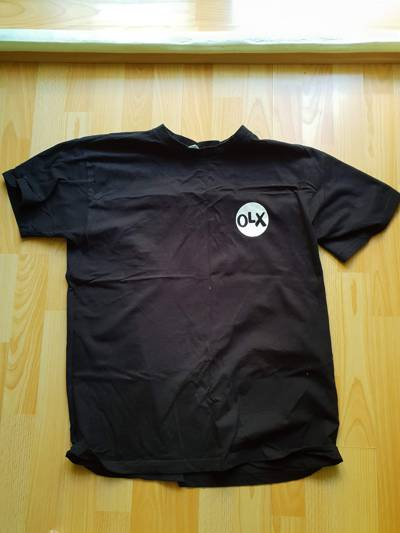

In [5]:
path = (
    "data/clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
)
load_img(path)

In [6]:
load_img(path).size

(400, 533)

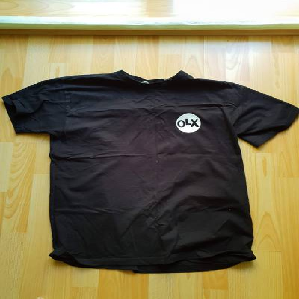

In [7]:
img = load_img(path, target_size=(299, 299))
img

In [8]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FD0D19E2330>


In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

In [10]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [11]:
x = img_to_array(img)

In [12]:
x.shape

(299, 299, 3)

# 8.3 Pre-trained CNN

- Imagenet dataset: https://www.image-net.org
- Pre-trained models: https://keras.io/api/applications

In [5]:
from keras.applications.xception import Xception, decode_predictions, preprocess_input

In [14]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

I0000 00:00:1734891633.795330   15174 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1679 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


Note: Equivalent to np.array([x])

In [15]:
X = tf.expand_dims(x, 0)
X.shape

TensorShape([1, 299, 299, 3])

In [16]:
X = preprocess_input(X)

In [17]:
pred = model.predict(X)

I0000 00:00:1734891637.024894   15228 service.cc:148] XLA service 0x7fcfe0001cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734891637.024946   15228 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-12-22 13:20:37.064658: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734891637.462891   15228 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-22 13:20:38.491599: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1734891639.352055   15228 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [18]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819633)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140036)),
  ('n04370456', 'sweatshirt', np.float32(0.03432474)),
  ('n03710637', 'maillot', np.float32(0.011354209)),
  ('n04525038', 'velvet', np.float32(0.0018453574))]]

# 8.5 Transfer learning

- Read data with ImageDataGenerator
- Train Xception on smaller images (150x150)

Note: Following is deprecated

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "data/clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

In [6]:
from keras.utils import image_dataset_from_directory

In [20]:
# Load the dataset
train_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical",
)
class_names = train_ds.class_names
num_classes = len(class_names)
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))

Found 3068 files belonging to 10 classes.


In [21]:
!ls -l data/clothing-dataset-small/train

total 256
drwxrwxr-x 2 vikramreddy vikramreddy 20480 Dec 21 17:00 dress
drwxrwxr-x 2 vikramreddy vikramreddy 12288 Dec 21 17:00 hat
drwxrwxr-x 2 vikramreddy vikramreddy 36864 Dec 21 17:00 longsleeve
drwxrwxr-x 2 vikramreddy vikramreddy 20480 Dec 21 17:00 outwear
drwxrwxr-x 2 vikramreddy vikramreddy 36864 Dec 21 17:00 pants
drwxrwxr-x 2 vikramreddy vikramreddy 24576 Dec 21 17:00 shirt
drwxrwxr-x 2 vikramreddy vikramreddy 16384 Dec 21 17:00 shoes
drwxrwxr-x 2 vikramreddy vikramreddy 20480 Dec 21 17:00 shorts
drwxrwxr-x 2 vikramreddy vikramreddy 12288 Dec 21 17:00 skirt
drwxrwxr-x 2 vikramreddy vikramreddy 57344 Dec 21 17:00 t-shirt


Note: deprecated

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "data/clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

In [22]:
# Load the dataset
val_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/validation",
    image_size=(150, 150),
    batch_size=32,
    shuffle=False,
    label_mode="categorical",
)

val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

Found 341 files belonging to 10 classes.


In [23]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

In [24]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

In [25]:
img = load_img(path, target_size=(150, 150))
x = img_to_array(img)
X = tf.expand_dims(x, 0)
X.shape

TensorShape([1, 150, 150, 3])

In [26]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [27]:
preds[0]

array([ -7.6302586 ,   6.843322  ,   5.108597  ,   0.75536346,
        -5.2470503 , -10.323708  ,  -5.4797077 ,   6.460797  ,
        -8.075043  ,  -8.924387  ], dtype=float32)

In [28]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

In [29]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2024-12-22 13:20:51.302901: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:20:51.414724: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:20:51.715867: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.59GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:20:51.853284: W external/local_xla/xla/ts

95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5789 - loss: 1.5658

2024-12-22 13:20:57.594646: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:20:57.694811: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.49GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:20:58.027384: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:20:58.311045: W external/local_xla/xla/ts

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5798 - loss: 1.5625

2024-12-22 13:21:03.676015: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-22 13:21:03.903618: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.57GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.5807 - loss: 1.5594 - val_accuracy: 0.7507 - val_loss: 1.0000
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8329 - loss: 0.5634 - val_accuracy: 0.8006 - val_loss: 0.8251
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8716 - loss: 0.4275 - val_accuracy: 0.7801 - val_loss: 0.8568
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9076 - loss: 0.2484 - val_accuracy: 0.8182 - val_loss: 0.8730
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9346 - loss: 0.1756 - val_accuracy: 0.7771 - val_loss: 0.9129
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9575 - loss: 0.1106 - val_accuracy: 0.8006 - val_loss: 0.9149
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9686 - loss: 0.0944 - val_accuracy: 0.8299 - val_loss: 0.9019
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9777 - loss: 0.0668 - val_accuracy: 0.8006 - val_loss: 

In [30]:
history.history["accuracy"]

[0.665580153465271,
 0.825945258140564,
 0.8692959547042847,
 0.9207953214645386,
 0.9410039186477661,
 0.9599087238311768,
 0.9677314162254333,
 0.9758800268173218,
 0.9882659912109375,
 0.9885919094085693]

In [31]:
history.history["val_accuracy"]

[0.7507331371307373,
 0.8005865216255188,
 0.7800586223602295,
 0.8181818127632141,
 0.7771260738372803,
 0.8005865216255188,
 0.829912006855011,
 0.8005865216255188,
 0.8152492642402649,
 0.803519070148468]

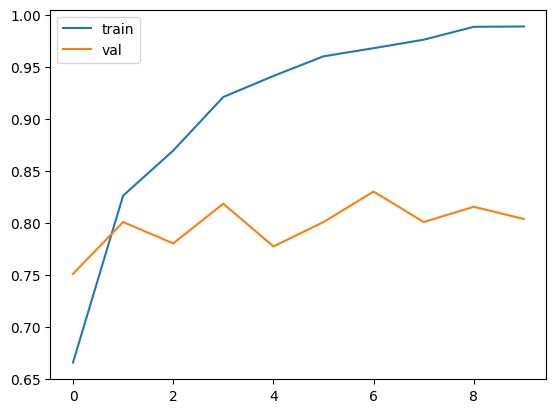

In [32]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")

plt.legend()
plt.show()

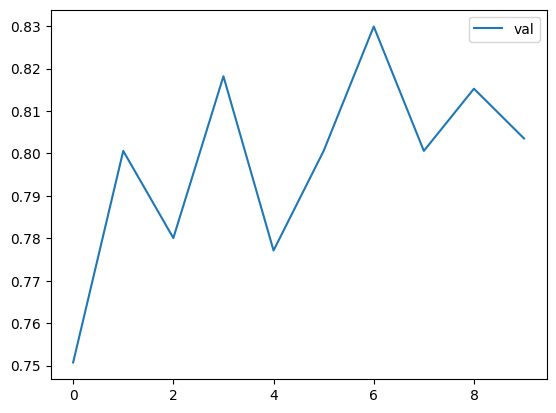

In [33]:
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

# 8.6 Adjusting the learning rate

In [35]:
def make_model(learning_rate):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    return model

In [37]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.2180 - loss: 2.1585 - val_accuracy: 0.5103 - val_loss: 1.5730
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5436 - loss: 1.4437 - val_accuracy: 0.6217 - val_loss: 1.2314
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6228 - loss: 1.1726 - val_accuracy: 0.6774 - val_loss: 1.0555
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6775 - loss: 1.0147 - val_accuracy: 0.7038 - val_loss: 0.9539
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6891 - loss: 0.9287 - val_accuracy: 0.7273 - val_loss: 0.8834
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7147 - loss: 0.8531 - val_accuracy: 0.7478 - val_loss: 0.8334
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7308 - loss: 0.7947 - val_accuracy: 0.7595 - val_loss: 0.7959
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7515 - loss: 0.7527 - val_accuracy: 0

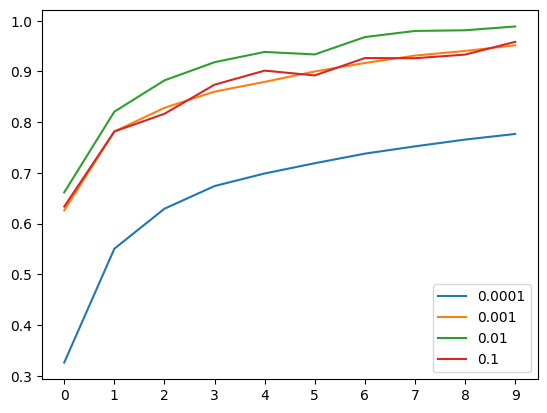

In [38]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

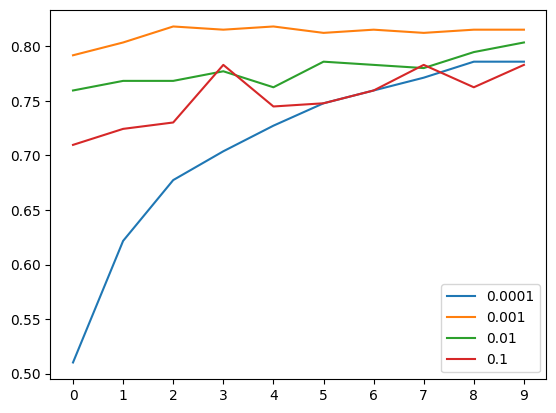

In [39]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [40]:
del scores[0.1]
del scores[0.0001]

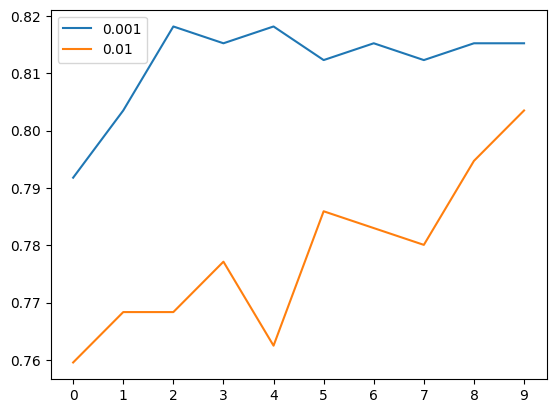

In [41]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [7]:
best_lr = 0.001

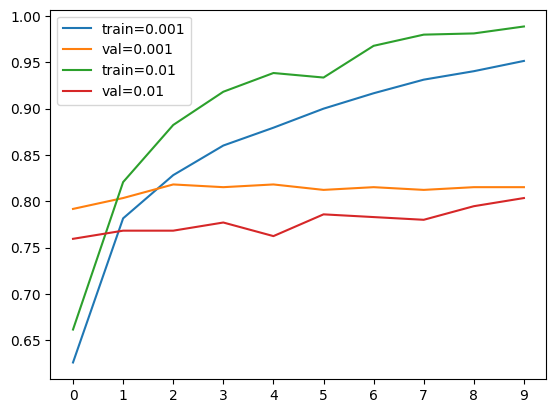

In [42]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % lr))
    plt.plot(hist["val_accuracy"], label=("val=%s" % lr))
plt.xticks(np.arange(10))
plt.legend()
plt.show()

# 8.7 checkpointing

In [8]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [49]:
model = make_model(best_lr)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.5376 - loss: 1.3943 - val_accuracy: 0.7918 - val_loss: 0.6965
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7720 - loss: 0.6467 - val_accuracy: 0.8006 - val_loss: 0.6112
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8143 - loss: 0.5200 - val_accuracy: 0.8065 - val_loss: 0.5864
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8511 - loss: 0.4412 - val_accuracy: 0.8240 - val_loss: 0.5599
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8807 - loss: 0.3836 - val_accuracy: 0.8299 - val_loss: 0.5474
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9029 - loss: 0.3352 - val_accuracy: 0.8328 - val_loss: 0.5455
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9152 - loss: 0.2915 - val_accuracy: 0.8270 - val_loss: 0.5292
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9279 - loss: 0.2675 - val_accuracy: 0.8182 -

# 8.8 Adding more layers

In [50]:
def make_model(learning_rate, size_inner=100):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    return model

In [51]:
scores = {}
for size in [10, 100, 1000]:
    print(size)
    model = make_model(best_lr, size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.3685 - loss: 1.7798 - val_accuracy: 0.6628 - val_loss: 1.0546
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6898 - loss: 0.9479 - val_accuracy: 0.7331 - val_loss: 0.8392
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7660 - loss: 0.7221 - val_accuracy: 0.7537 - val_loss: 0.7368
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8070 - loss: 0.5769 - val_accuracy: 0.7771 - val_loss: 0.6905
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8287 - loss: 0.5141 - val_accuracy: 0.7947 - val_loss: 0.6583
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8531 - loss: 0.4452 - val_accuracy: 0.7947 - val_loss: 0.6385
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8799 - loss: 0.3882 - val_accuracy: 0.7830 - val_loss: 0.6328
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8991 - loss: 0.3451 - val_accuracy: 0.797

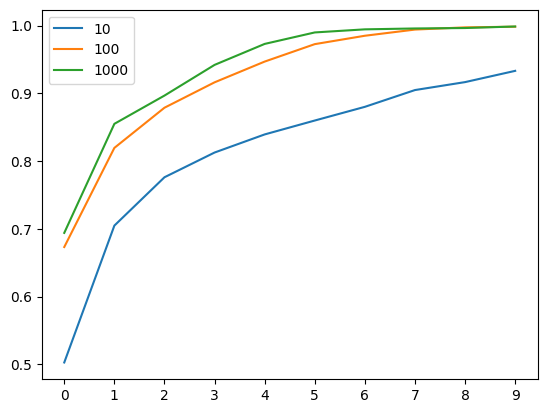

In [57]:
for size, hist in scores.items():
    plt.plot(hist["accuracy"], label=size)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

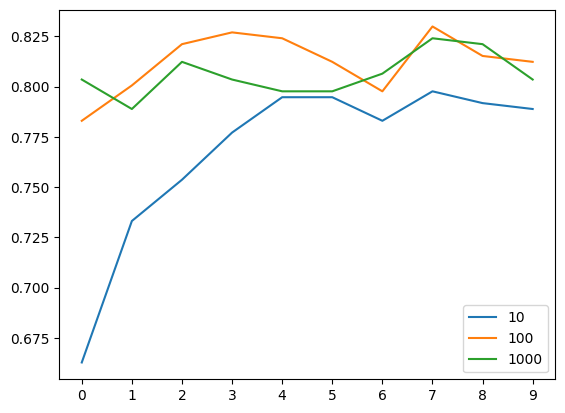

In [58]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=size)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [60]:
del scores[10]
del scores[1000]

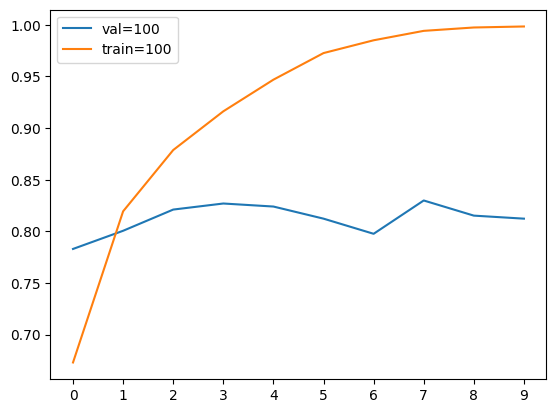

In [62]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % size))
    plt.plot(hist["accuracy"], label=("train=%s" % size))
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [8]:
best_size = 100

# 8.9 Regularization and dropout

In [11]:
def make_model(learning_rate, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    return model

In [65]:
scores = {}
for droprate in [0, 0.2, 0.5, 0.8]:
    print(droprate)
    model = make_model(best_lr, best_size, droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.5632 - loss: 1.3303 - val_accuracy: 0.7537 - val_loss: 0.7470
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8072 - loss: 0.5404 - val_accuracy: 0.8065 - val_loss: 0.6266
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8576 - loss: 0.3998 - val_accuracy: 0.8152 - val_loss: 0.5764
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9122 - loss: 0.2762 - val_accuracy: 0.8270 - val_loss: 0.5923
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9380 - loss: 0.2088 - val_accuracy: 0.8152 - val_loss: 0.5865
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9651 - loss: 0.1483 - val_accuracy: 0.8065 - val_loss: 0.6122
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9796 - loss: 0.1019 - val_accuracy: 0.8182 - val_loss: 0.6138
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9894 - loss: 0.0734 - val_accuracy: 0.7771

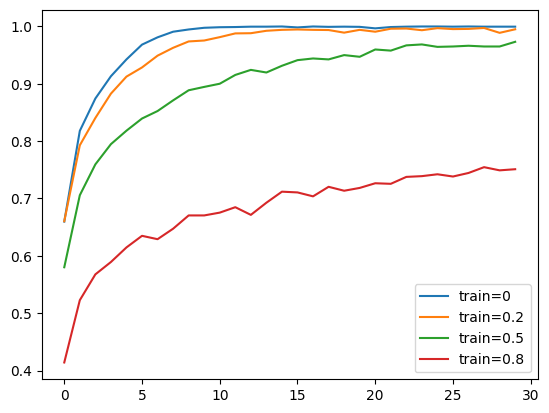

In [77]:
for droprate, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % droprate))

plt.legend()
plt.show()

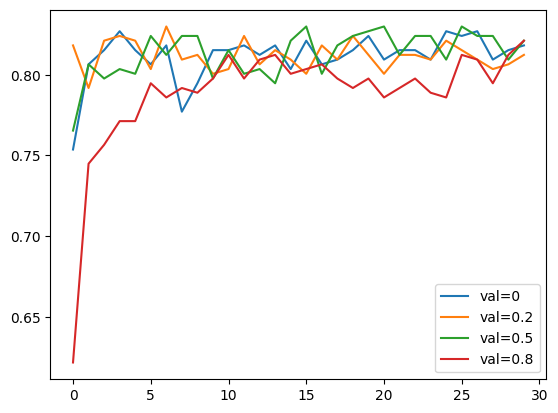

In [78]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

plt.legend()
plt.show()

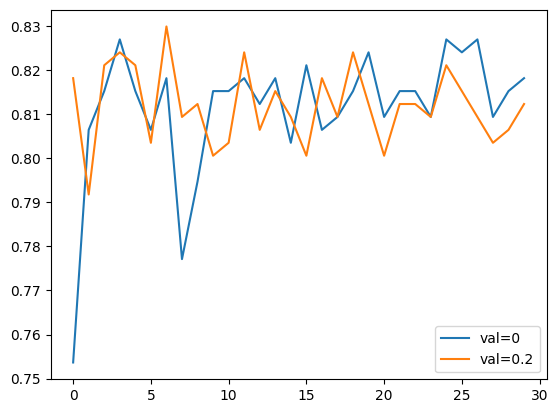

In [79]:
droprate = 0
hist = scores[droprate]
plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

droprate = 0.2
hist = scores[droprate]
plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

plt.legend()
plt.show()

In [9]:
best_droprate = 0.2

# 8.10 Data augmentation

a) Data augmentation using keras.layers

In [22]:
# Define data augmentation layers
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("vertical"),  # Equivalent to vertical_flip=True
        # keras.layers.RandomRotation(0.01),  # Approximation of shear_range
        keras.layers.RandomZoom(height_factor=0.1),  # Equivalent to zoom_range=0.1
    ]
)

# Load the dataset
train_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical",
)

class_names = train_ds.class_names
num_classes = len(class_names)

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(preprocess_input(x)), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)


# Load the dataset
val_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/validation",
    image_size=(150, 150),
    batch_size=32,
    shuffle=False,
    label_mode="categorical",
)

val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.


In [23]:
model = make_model(best_lr, best_size, best_droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.4611 - loss: 1.5850 - val_accuracy: 0.7361 - val_loss: 0.7894
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6923 - loss: 0.8884 - val_accuracy: 0.7566 - val_loss: 0.7031
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7299 - loss: 0.7836 - val_accuracy: 0.7742 - val_loss: 0.6802
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7585 - loss: 0.6809 - val_accuracy: 0.7595 - val_loss: 0.6569
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7800 - loss: 0.6341 - val_accuracy: 0.7889 - val_loss: 0.6399
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8047 - loss: 0.5983 - val_accuracy: 0.7801 - val_loss: 0.6042
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8125 - loss: 0.5461 - val_accuracy: 0.7889 - val_loss: 0.5904
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8243 - loss: 0.4861 - val_accuracy: 0.7742 -

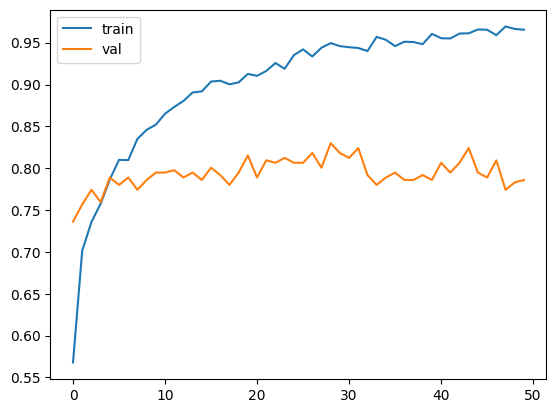

In [24]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

In [15]:
max(history.history["val_accuracy"])

0.7947214245796204

b) Data augmentation using tf.image

In [37]:
def augment_image(image):
    # Vertical flip
    image = tf.image.random_flip_up_down(image)

    # Shear-like rotation (approximated by small random rotations)
    image = tf.image.rot90(
        image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

    # Random zoom (cropping and resizing to simulate zoom)
    crop_fraction = tf.random.uniform(
        [], 0.8, 1.0, dtype=tf.float32
    )  # Random crop fraction
    crop_size = tf.cast(
        crop_fraction * tf.cast(tf.shape(image)[:2], tf.float32), tf.int32
    )
    crop_size = tf.stack(
        [crop_size[0], crop_size[1], tf.shape(image)[-1]]
    )  # Ensure size is 3-dimensional
    image = tf.image.random_crop(image, size=crop_size)
    image = tf.image.resize(image, (150, 150))  # Resize back to original dimensions

    return image

In [38]:
# Load the dataset
train_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/train",
    image_size=(150, 150),
    batch_size=None,
    label_mode="categorical",
)

class_names = train_ds.class_names
num_classes = len(class_names)

train_ds = train_ds.map(
    lambda x, y: (preprocess_input(augment_image(x)), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)


# Load the dataset
val_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/validation",
    image_size=(150, 150),
    batch_size=32,
    shuffle=False,
    label_mode="categorical",
)

val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Prefetch for performance
train_ds = train_ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.


In [39]:
model = make_model(best_lr, best_size, best_droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.4322 - loss: 1.6941 - val_accuracy: 0.7214 - val_loss: 0.8396
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6470 - loss: 1.0535 - val_accuracy: 0.7243 - val_loss: 0.8589
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6935 - loss: 0.9260 - val_accuracy: 0.7243 - val_loss: 0.8207
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6936 - loss: 0.8729 - val_accuracy: 0.7449 - val_loss: 0.7618
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7268 - loss: 0.7982 - val_accuracy: 0.6921 - val_loss: 0.8733
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7376 - loss: 0.7892 - val_accuracy: 0.7390 - val_loss: 0.7787
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7306 - loss: 0.7740 - val_accuracy: 0.7185 - val_loss: 0.7797
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7490 - loss: 0.7355 - val_accuracy: 0.7537 -

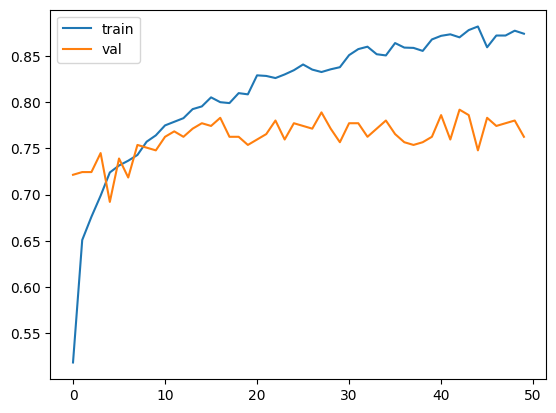

In [40]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

# 8.11 Training a larger model (Functional API)

In [7]:
def make_model(input_size, learning_rate, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    return model

In [8]:
best_size = 100
best_droprate = 0.2
best_lr = 0.001
input_size = 299

In [9]:
# Define data augmentation layers
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("vertical"),  # Equivalent to vertical_flip=True
        keras.layers.RandomRotation(0.01),  # Approximation of shear_range
        keras.layers.RandomZoom(height_factor=0.1),  # Equivalent to zoom_range=0.1
    ]
)

# Load the dataset
train_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/train",
    image_size=(input_size, input_size),
    batch_size=32,
    label_mode="categorical",
)

class_names = train_ds.class_names

train_ds = train_ds.map(
    lambda x, y: (
        data_augmentation(preprocess_input(x)),
        y,
    ),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Load the dataset
val_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/validation",
    image_size=(input_size, input_size),
    batch_size=32,
    label_mode="categorical",
    shuffle=False,
)

val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3068 files belonging to 10 classes.


I0000 00:00:1735068044.130858   26062 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10520 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


Found 341 files belonging to 10 classes.


In [10]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_final_{epoch:02d}_{val_accuracy:.3f}.keras",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [ ]:
model = make_model(input_size, best_lr, best_size, best_droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50


I0000 00:00:1735068062.971462   26184 service.cc:148] XLA service 0x7f32cc40bb60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735068062.971512   26184 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-12-24 14:21:03.219628: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735068064.083926   26184 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-24 14:21:06.464588: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 10.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-24 14:21:07.281036: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deall

 1/96 ━━━━━━━━━━━━━━━━━━━━ 22:31 14s/step - accuracy: 0.1562 - loss: 2.3277

I0000 00:00:1735068072.046084   26184 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/96 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.4707 - loss: 1.6049

# 8.12 Using the model

In [10]:
model = keras.models.load_model("xception_final_15_0.880.keras")

I0000 00:00:1734978020.843827   13116 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10520 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


In [14]:
input_size = 299

In [15]:
# Load the dataset
test_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/test",
    image_size=(input_size, input_size),
    batch_size=32,
    label_mode="categorical",
    shuffle=False,
)


test_ds = test_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

Found 372 files belonging to 10 classes.


In [16]:
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

I0000 00:00:1734978115.758433   13560 service.cc:148] XLA service 0x7945b440b880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734978115.758502   13560 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-12-23 13:21:55.960691: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734978116.429849   13560 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-23 13:21:58.582499: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 10.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-23 13:21:59.361689: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deall

 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:47 10s/step - accuracy: 0.8438 - loss: 0.3017

I0000 00:00:1734978123.470136   13560 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8509 - loss: 0.3964

2024-12-23 13:22:07.440938: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
E0000 00:00:1734978127.896097   13558 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734978128.119481   13558 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734978128.743649   13558 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734978129.001561   13558 gpu_timer.cc:82] Delay kernel timed out: measured tim

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 806ms/step - accuracy: 0.8565 - loss: 0.3817
Test Loss: 0.30065131187438965
Test Accuracy: 0.8870967626571655


In [16]:
path = "data/clothing-dataset-small/test/shoes/0dd87e47-ca85-4d5c-9fd1-59f5a01eb656.jpg"
img = load_img(path, target_size=(input_size, input_size))
x = img_to_array(img)
X = tf.expand_dims(x, 0)
X.shape

TensorShape([1, 299, 299, 3])

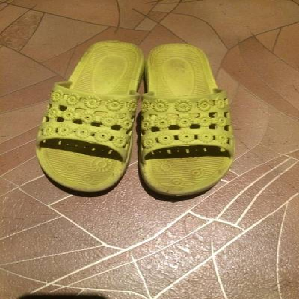

In [17]:
img

In [18]:
X = preprocess_input(X)

In [20]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [21]:
dict(zip(class_names, pred[0]))

{'dress': np.float32(-2.3840156),
 'hat': np.float32(0.84474134),
 'longsleeve': np.float32(-3.6815083),
 'outwear': np.float32(-3.1609235),
 'pants': np.float32(1.2200655),
 'shirt': np.float32(-3.8975043),
 'shoes': np.float32(15.427078),
 'shorts': np.float32(0.44330835),
 'skirt': np.float32(-5.8082275),
 't-shirt': np.float32(-2.0457628)}

# 8.13a Training using Subclassing API
Class implementation to store metadata

In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.applications.xception import Xception, preprocess_input
from keras.utils import (
    image_dataset_from_directory,
    img_to_array,
    load_img,
    register_keras_serializable,
)
from tensorflow import keras

In [8]:
@register_keras_serializable(package="Custom")
class CustomModel(keras.Model):
    def __init__(
        self,
        input_size,
        num_classes,
        size_inner=100,
        droprate=0.5,
        metadata=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.num_classes = num_classes
        self.size_inner = size_inner
        self.droprate = droprate
        self.metadata = metadata  # Metadata for saving class names and input size

        # Base Model (Xception)
        self.base_model = Xception(
            weights="imagenet",
            include_top=False,
            input_shape=(input_size, input_size, 3),
        )
        self.base_model.trainable = False

        # Layers for the custom model
        self.global_pool = layers.GlobalAveragePooling2D()
        self.inner_dense = layers.Dense(size_inner, activation="relu")
        self.dropout = layers.Dropout(droprate)
        self.output_layer = layers.Dense(num_classes)

    def call(self, inputs, training=False):
        x = self.base_model(inputs, training=False)
        x = self.global_pool(x)
        x = self.inner_dense(x)
        x = self.dropout(x, training=training)
        return self.output_layer(x)

    def get_config(self):
        # Include metadata in the configuration
        config = super().get_config()
        config.update(
            {
                "input_size": self.input_size,
                "num_classes": self.num_classes,
                "size_inner": self.size_inner,
                "droprate": self.droprate,
                "metadata": self.metadata,
            }
        )
        return config

    @classmethod
    def from_config(cls, config):
        metadata = config.pop("metadata", None)
        return cls(metadata=metadata, **config)

In [8]:
def make_model(
    input_size, learning_rate, class_names, metadata, size_inner=100, droprate=0.5
):
    model = CustomModel(
        input_size=input_size,
        num_classes=len(class_names),
        size_inner=size_inner,
        droprate=droprate,
        metadata=metadata,
    )
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])
    return model

In [9]:
# Best parameters
best_size = 100
best_droprate = 0.2
best_lr = 0.001
input_size = 299

In [10]:
# Define data augmentation layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("vertical"),  # Equivalent to vertical_flip=True
        layers.RandomRotation(0.01),  # Approximation of shear_range
        layers.RandomZoom(height_factor=0.1),  # Equivalent to zoom_range=0.1
    ]
)

I0000 00:00:1734992581.107473   18937 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10520 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


In [11]:
# Load the dataset
train_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/train",
    image_size=(input_size, input_size),
    batch_size=32,
    label_mode="categorical",
)

class_names = train_ds.class_names
metadata = {"class_names": class_names}

train_ds = train_ds.map(
    lambda x, y: (
        data_augmentation(preprocess_input(x)),
        y,
    ),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Load the dataset
val_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/validation",
    image_size=(input_size, input_size),
    batch_size=32,
    label_mode="categorical",
    shuffle=False,
)

val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.


In [12]:
# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_final_{epoch:02d}_{val_accuracy:.3f}.keras",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [14]:
model = make_model(input_size, best_lr, class_names, metadata, best_size, best_droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50


I0000 00:00:1734992605.573392   19031 service.cc:148] XLA service 0x73320440be00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734992605.573448   19031 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-12-23 17:23:25.852112: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734992606.646124   19031 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-23 17:23:28.903007: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 10.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-23 17:23:29.712846: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deall

 1/96 ━━━━━━━━━━━━━━━━━━━━ 23:27 15s/step - accuracy: 0.1250 - loss: 2.3346

I0000 00:00:1734992614.756633   19031 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5084 - loss: 1.4711

2024-12-23 17:23:51.309008: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.84GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
E0000 00:00:1734992632.146734   19031 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734992632.374372   19031 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734992633.703652   19031 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734992633.968936   19031 gpu_timer.cc:82] Delay kernel timed out: measured tim

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.5097 - loss: 1.4674

2024-12-23 17:24:04.536431: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
E0000 00:00:1734992645.014779   19027 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734992645.240993   19027 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734992645.915896   19027 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734992646.178154   19027 gpu_timer.cc:82] Delay kernel timed out: measured tim

96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.5109 - loss: 1.4638 - val_accuracy: 0.8211 - val_loss: 0.5647
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.7402 - loss: 0.7459 - val_accuracy: 0.8563 - val_loss: 0.4746
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.7944 - loss: 0.6245 - val_accuracy: 0.8299 - val_loss: 0.4669
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.8156 - loss: 0.5608 - val_accuracy: 0.8563 - val_loss: 0.4083
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.8294 - loss: 0.5100 - val_accuracy: 0.8475 - val_loss: 0.4251
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.8383 - loss: 0.4840 - val_accuracy: 0.8328 - val_loss: 0.4168
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.8472 - loss: 0.4472 - val_accuracy: 0.8504 - val_loss: 0.4038
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.8546 - loss: 0.4125 - val_accuracy: 0.862

KeyboardInterrupt: 

# 8.13b Using the model

In [9]:
model = keras.models.load_model(
    "xception_final_21_0.886.keras", custom_objects={"CustomModel": CustomModel}
)

I0000 00:00:1734996720.620984   23466 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10520 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


In [11]:
input_size = model.input_size
class_names = model.metadata["class_names"]

In [12]:
# Load the dataset
test_ds = image_dataset_from_directory(
    "data/clothing-dataset-small/test",
    image_size=(input_size, input_size),
    batch_size=32,
    label_mode="categorical",
    shuffle=False,
)

test_ds = test_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Found 372 files belonging to 10 classes.


I0000 00:00:1734993881.825511   21035 service.cc:148] XLA service 0x74a4600038e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734993881.825549   21035 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-12-23 17:44:42.039825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734993882.435310   21035 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-23 17:44:44.557874: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 10.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-23 17:44:45.354882: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deall

 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:50 10s/step - accuracy: 0.8750 - loss: 0.3714

I0000 00:00:1734993889.446647   21035 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8602 - loss: 0.3673

2024-12-23 17:44:53.403843: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
E0000 00:00:1734993893.863102   21031 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734993894.085046   21031 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734993894.708576   21031 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734993894.966389   21031 gpu_timer.cc:82] Delay kernel timed out: measured tim

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 806ms/step - accuracy: 0.8660 - loss: 0.3556
Test Loss: 0.2912467420101166
Test Accuracy: 0.897849440574646


In [13]:
path = "data/clothing-dataset-small/test/shoes/0dd87e47-ca85-4d5c-9fd1-59f5a01eb656.jpg"
img = load_img(path, target_size=(input_size, input_size))
x = img_to_array(img)
X = tf.expand_dims(x, 0)
X.shape

TensorShape([1, 299, 299, 3])

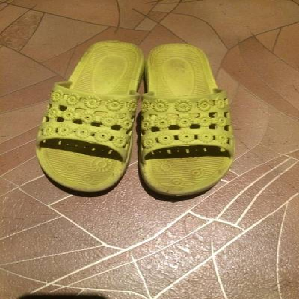

In [14]:
img

In [15]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [16]:
predicted_class = class_names[tf.argmax(pred[0])]
predicted_class

'shoes'

In [17]:
dict(zip(class_names, pred[0]))

{'dress': np.float32(-3.7317235),
 'hat': np.float32(-1.4375026),
 'longsleeve': np.float32(-2.9527073),
 'outwear': np.float32(-2.8156424),
 'pants': np.float32(0.6027568),
 'shirt': np.float32(-7.240806),
 'shoes': np.float32(17.905457),
 'shorts': np.float32(-3.8627806),
 'skirt': np.float32(-8.443188),
 't-shirt': np.float32(-4.468358)}